# *Emotions Image Classification*
     6 labels: ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness','Surprise']
     3 datasets: Train, Test, Val


### *Import* 

In [2]:
from tensorflow import keras
import pandas as pd
import os


from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dense

### *Assigning Path for Dataset*

In [3]:
train_dir=r'C:\Users\Huynhtu\OneDrive\Máy tính\Project_eINTERFACE_2021_Image\train'
test_dir=r'C:\Users\Huynhtu\OneDrive\Máy tính\Project_eINTERFACE_2021_Image\test'

### *How many categories and images?*

In [4]:
import tensorflow as tf

In [ ]:
train=tf.keras.utils.image_dataset_from_directory(train_dir)
test= tf.keras.utils.image_dataset_from_directory(test_dir)

### *Some random images*

In [5]:
train_iterator=train.as_numpy_iterator()

In [6]:
batch=train_iterator.next()

In [7]:
batch[0].max()

253.70312

In [8]:
batch[1]

array([5, 5, 0, 0, 1, 2, 4, 2, 4, 0, 5, 4, 0, 1, 4, 0, 0, 3, 0, 2, 2, 1,
       4, 5, 5, 3, 1, 2, 3, 0, 4, 5], dtype=int32)

In [9]:
import matplotlib.pyplot as plt

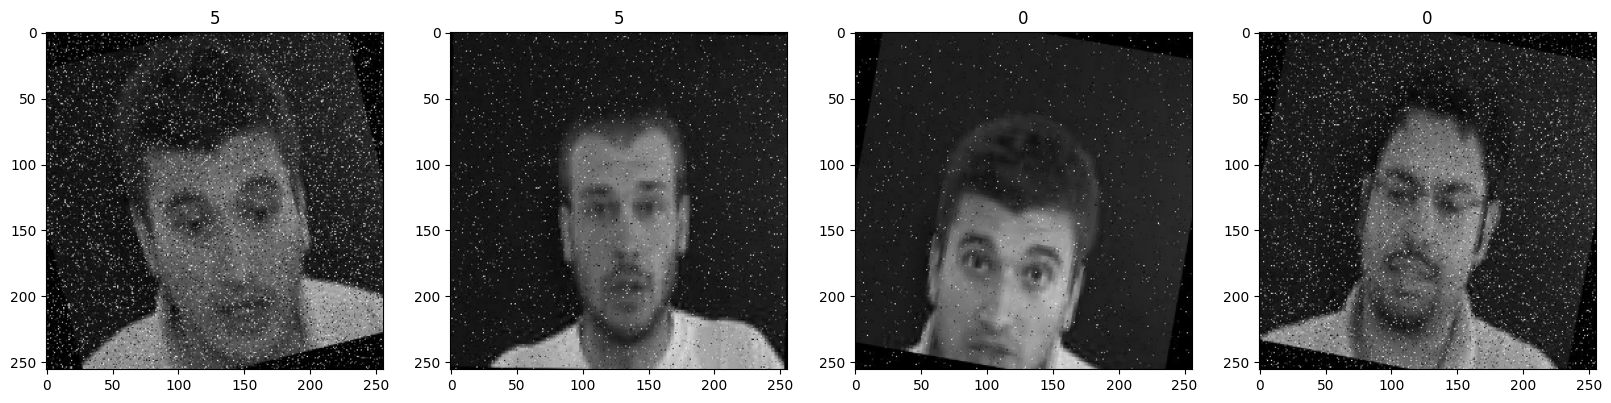

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preparing data for training

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [12]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
## model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [14]:
history = classifier.fit(training_set,
                         epochs = 20,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/20
180/180 [==============================] - 551s 3s/step - loss: 1.7495 - accuracy: 0.2336 - val_loss: 1.6323 - val_accuracy: 0.3220
Epoch 2/20
180/180 [==============================] - 546s 3s/step - loss: 1.4664 - accuracy: 0.4028 - val_loss: 1.3603 - val_accuracy: 0.4159
Epoch 3/20
180/180 [==============================] - 501s 3s/step - loss: 1.1716 - accuracy: 0.5320 - val_loss: 1.0935 - val_accuracy: 0.5702
Epoch 4/20
180/180 [==============================] - 512s 3s/step - loss: 0.9714 - accuracy: 0.6179 - val_loss: 0.9124 - val_accuracy: 0.6405
Epoch 5/20
180/180 [==============================] - 607s 3s/step - loss: 0.8459 - accuracy: 0.6719 - val_loss: 0.8221 - val_accuracy: 0.7065
Epoch 6/20
180/180 [==============================] - 558s 3s/step - loss: 0.753

### Evaluating the model

In [15]:
classifier.evaluate(test_set)

23/23 [==============================] - 47s 2s/step - loss: 0.4355 - accuracy: 0.8401


[0.43552327156066895, 0.8400556445121765]

Text(0, 0.5, 'Loss')

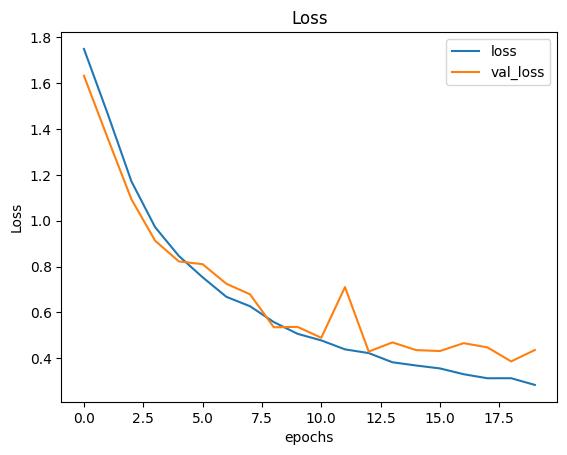

In [16]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

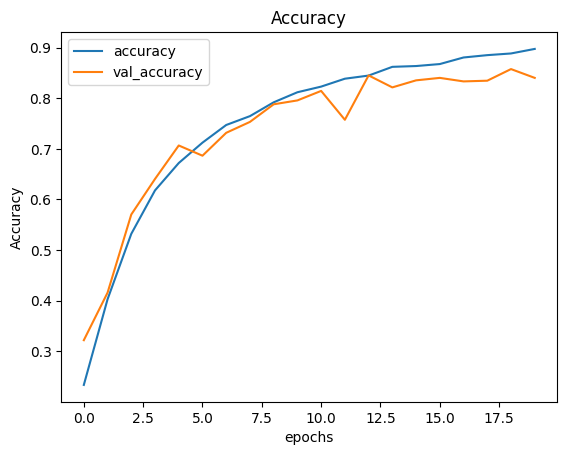

In [17]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [ ]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import numpy as np
import cv2
from PIL import Image
import os
#path='/home/azureuser/cloudfiles/code/'
img=r'C:\Users\Huynhtu\OneDrive\Máy tính\Project_eINTERFACE_2021_Image\test\Happiness\myvideo_frames0_jpg.rf.46e286792b4b5d7ce6dd0a28bd68cdb6.jpg'
img= cv2.imread(img)

image_fromarray = Image.fromarray(img, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

In [19]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}

The expression corresponds to the emotion: Surprise


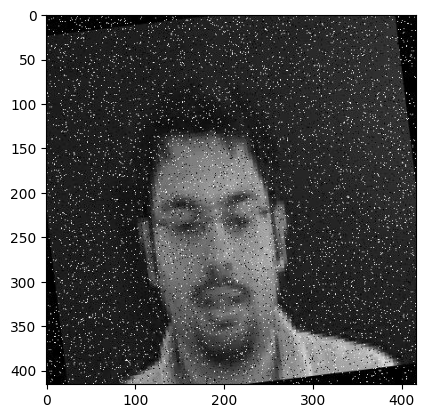

In [22]:
classes = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']
class_mapping = {'Anger': 0, 'Disgust': 1, 'Fear': 2, 'Happiness': 3, 'Sadness': 4, 'Surprise': 5}
plt.imshow(img)
for class_name, class_value in class_mapping.items():
    if result == class_value:
        print(f"The expression corresponds to the emotion: {class_name}")
        break
else:
    print("No emotion corresponds to the given result.")
